%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

# Introduction to the Theory of WAS

This notebook discusses the concepts and ideas that you need to know to use WAS. 
Using WAS is discussed in the [Introduction to the Usage of WAS notebook](google.com).  

## WAS is a Water Allocation System

The Water Allocation System (WAS) uses information about water sources, infrastructure, demand for water, and cooperation plans to build a model of a water system.  **WAS is special because it determines where water _should_ be allocated in order to achieve the greatest (optimal) social beneits.**  WAS also calculates the value of each water source, piece of infrastructure, and trade agreement.  It is designed to facilitate peacebuilding via water sharing among Israel, Jordan, and Palestine.  By calculating the benefits of cooperation and showing policy makers the best options for water sharing and trading, WAS hopes to encourage peaceful cooperation between nations.

To determine the conditions that lead the greatist social benefits, (called the optimal condition), WAS uses economic theory to take all the information available and makes an equation that determines the benefit to society based on water allocation.  The total benefit to society is called _**social welfare**_.

$$Social\ Welfare\ =\ function(Water\ Model)$$

Once the user has chosen the specific inputs to be considered, WAS uses a mathematical algortihm to determine the solutions that maximize Social Welfare.

$$Social\ Welfare{max}\ =\ function(Water\ Model_{optimal}) $$

The results tell the user how to optimally allocate water, as well as the value of each part of the model, such as water source, connection, treatment plant, trade agreement, etc. 

_**It is vital to understand that WAS does not make Policy, it only serves as a tool to guide it.**_

More specifically, WAS does the following:

* [Calculates total social surplus](####WAS calculates social surplus)

* [Calcuclates market equilibrium for each market](####WAS calculates equilibrium)

* Calculates optimal water allocation to each market to maximize social surplus

* Calculate the (shadow) values of infrastructre and other transportation projects. 


## Applications of WAS
  WAS can be used to discover:
 * The best places and ways for countries to buy and sell water with eachother
 * The net benefits for each contry if they buy and sell wate with eachother
 * The best places for countries to collaborate on building new infrastrucutre
 * The net benefits for each country if they collaborate to build infrastructure
 * The best way to allocate water that ensures sustainable usage of water
 
and within each country:
 * Where new infrastrucute is needed
 * The most beneficial water projects
 * Whether the benefits of a project outweigh the costs
 * The effects of different social policies 
 

## Fundamental Economic Concepts

in order to understand WAS, it is necessary to understand the concepts in this section.  Users who are already familiar with these ideas may still find it beneficial to read this section because water markets operate differently from classic markets.

### How to Measure the Value of Water in Economic Terms

The economic value of water is determined by the buyer's willingness to pay for it.  In economics, if a buyer is willing to pay \$2 for a gallon of water, the _value_ of that water is \$2, even if the price is only \$1.  _Economic value_ does not capture the _personal value_ of water to a person stranded in the desert.  To her, a gallon of water is more valuable than \$2, and indeed, water can have high _pesonal or social value_ even when its not affordable.  WAS [provides a way](google.com) for users to account for the personal and social value of water of those in need.  It is important to do so when modeling low-income or refugee populations that need free or subsidized access to water.  

Most people in the economy, however, are able to afford some amount of water.  The important question is how much each people and institutions values that water.  Thus, for the purposes of calculating the benefits of water allocation WAS uses the concept of _economic value_ as described below.  We will call the _economic value of water_ in WAS the _value of water_. 

The value of water is based on how much a user is willing to pay for water.  The vaue of water declines as more is used.  Each additional unit that is desired, or demanded, is less valuable then the last.  This makes sense: A household will be willing to pay more for its first units of water since they are essential for drinking and cooking.  Subsequent units of water needed for showing or cleaning are less important, and a household would be willing to pay less for them.  This means they are less valuable.  A household would be willing to pay even less for the last units of water needed to water the garden.  This water is the least valuable.  So, **if we know how much a household is willing to pay for water, we know the value of the water.**  You can use the slider below to see the welfare (benefits) for a household at different price levels.

econgraphs/__init__.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.multiplier/Q)**(1/self.elasticity)


<function ipywidgets.widgets.interaction.<lambda>>

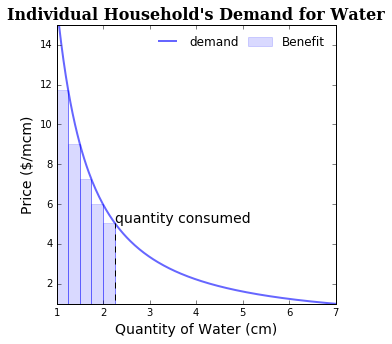

In [1]:
%pylab inline
from econgraphs import Market, springMarket, scenarioSimulator, graphMaker
from ipywidgets import interact, interactive, fixed
interact(graphMaker.drawHouseholds,price=(0,11,.5),annotate=True)

The graph above shows the quantity of water that a household is willing to purchase at a given price.  As the quantity of water used rises, the household is willing to pay less for the next unit.  Each blue bar represents (roughly) the household's benefit from using that unit of water.  The benefit is high for the first units, since the household would be willing to pay a lot for them.  The benefit is low for the last units, since the household pretty much has all of the water it needs.

Note the causality in this example: The first units of water are not valuable _because_ a household is willing to pay more for it, a household is willing to pay more for it _because_ it considers the water very valuable.  We use the households willingness to pay as a measure of value becuase it signals how much the household values the water.

##### Society's demand curve

To measure society's value for water, we aggregate household and other buyers' demand curves into one line, called the **demand curve**, which represents the social demand for water at different prices.  

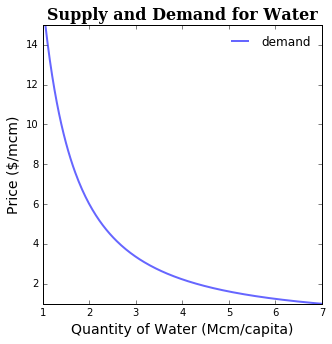

In [2]:
graphMaker.drawDemand()

Each point on the demand line represents a qunatity (Q) and a price (P).  Each quantity level (Q) has a price (P) that shows how much society would be willing to pay for the next unit (Q+1) of water. For instance, at quantity Q = 2, the price consumer are willing to pay for the next unit of water (P) = 6. Since the price (P) represents the maximum society would be willing to pay, it represents the social value of the Qth unit of water.  The area under the demand curve represents the (gross) total social value of water, which is also the social welfare from using the water.  

For info on how we estimate the demand line, see the [Demand Estimation Notebook](google.com)

*graphMaker.drawDemand(subsidy = 3, annotate = True)

##### The costs of providing water

We need to include the costs of providing water in our calculation of social welfare.  To do so, we draw a line representing the cost of providing each quantity of water, called the **supply curve**.  The cost of water increases as more is used.  This makes sense: The first units of water supplied will come from sources that are easy to access, but as those sources are exhausted, it will be more expensive to find and pump additional units of water.  


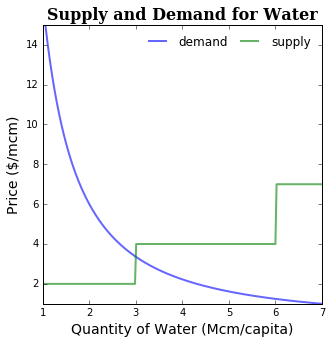

In [3]:
graphMaker.drawFigure(drawSurplus = False)

Each point on the supply line represents a quantity (Q) and price (P).  Each quantity level (Q) has a price (P)  that is the same as the cost of production.  For instance, at quantity Q = 2, the price of providing water (P) = 2.  The supply curve has a strange shape - like stairs - becuase of the nature of water provision: building pumps and pipes is very expensive, but once they are built, it is virtually free to operate them.  Each step in the supply function represents a new pump or pipe that must be built to supply additional water when previous infrastructure cannot pump any more water.

##### Social Welfare

The overall (net) benefit of providing water, called **Social Welfare** is given by the total shaded area (the **surplus**).  The word _surplus_ is used becuase the shaded area represents he surplus (extra) value that a consumer gains when she buys water for less than she would have paid.

$$Surplus = Total\ Benefits - Total\ Costs$$  
This graph below shows that the Social Welfare is the _total (gross) social benefit_ from water minus the _total cost_ of providing the water.

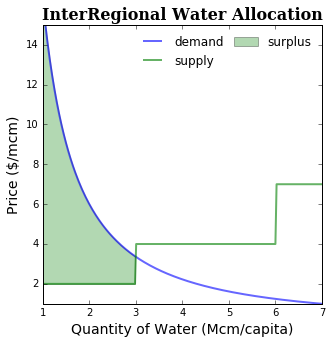

In [4]:
graphMaker.drawFigure()

The shaded area represents the net social gain, or _**surplus**_, from providing all the water that is demanded.

Notice that there social welfare does not increase for supply levels where the supply line is above the demand line.  When this is the case, the costs of providing water is more than people are willing to pay for the water, and thus consumers will not use it even if it is available.  

#### WAS calculates social surplus

When WAS maximizes the social welfare of water consumption, it is maximizing the surplus as shown above.  It calculates the total surplus from all markets based on how water is allocated.

### Equilibrium in the Marketplace

In a classical marketplace, equilibrium is when the quantity supplied is equal to the quantity demanded.  At this point, the price that buyers are willing to pay is the same as the cost of supplying the good.  Equilibrium levels of supply and demand at eqilibrium are said to be optimal, because they maximize the overall social welfare (total surplus) from providing water.  This is also true in a water market.



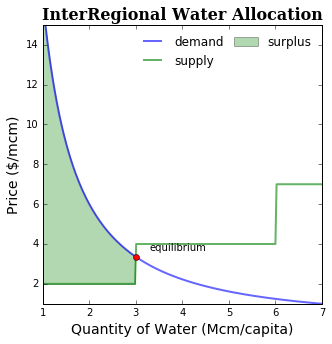

In [5]:
graphMaker.annotate()
graphMaker.drawFigure(annotate=True)

#### A Market for Water

The water market is different from a efficient classical market in two important ways:
 * Water is supplied at cost instead of at the equilibrium price
 * There physical market for water does not really exist: instead, pricing is determined by a state administrator

These concepts are discussed below.

Classical vs. Water Market:

In a classic market, there is only one price, and each unit supplied has the same price.  This is not the case for water.  In the Water market, each unit is sold _at cost_, meaning the price is equal to the cost of supplying the water.  This means the first unit of water is inexpensive, but after a certain amount of water is used, each additional unit of water is more expensive. 

In the water market, because the price of each unit of water is equal to the cost of supplying it, there is no producer suprlus; **all surplus is consumer surplus**.

Thus, the supply curve in the water market represents both: 
* The cost of production for different quantities of water, as in a classical market 
* The price that buyers pay for water after they have used different quantities of water.

Use the graph below to see the total social surplus as quantity supplied changes.

<function ipywidgets.widgets.interaction.<lambda>>

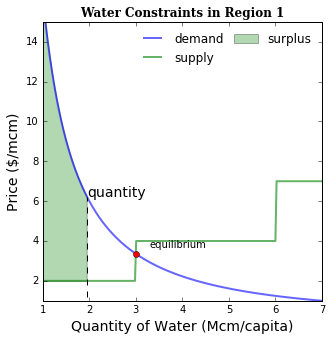

In [6]:
interact(graphMaker.drawQuantity,quantity = (1,3.5,.05),annotate=True)



Real Market vs Water Market:

In reality, _**there is no market for Water**_ - nor should there be.  It would be wasteful for competing suppliers to build multiple pipelines and wells in the same place.  For this reason, instead of a free market, a municipal or state administration determines water prices by using a model like WAS to simulate the market.  Thus, although there is no real market for water, society can still achieve the maxiumum social welfare that would arise in such a market.

#### WAS calculates equilibrium

WAS does all of these calculations based on information it is given by the user.  It is up to the policy makers to implement policies that will lead to the optimal water allocation described by WAS.

### Optimal Allocation Outside of Equilibrium

Not every water market has enough water to reach equilibrium, especially in the Middle East. When water is scarce it becomes even more important to maximize the value that society recieves from it.  Consider a region with two markets and insufficinet water for both markets to reach equilibrum.  You can use the slider the change the fraction of the water supply that is sent to market 1.

<function ipywidgets.widgets.interaction.<lambda>>

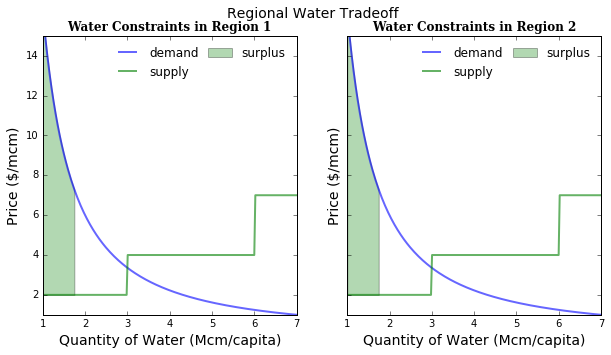

In [7]:
interact(graphMaker.drawTradeoff, totalSupply = fixed(3.5), firstMarketFrac = (.1,1,.1),otherMarket=fixed(None),annotate=fixed(False))

The shaded area shows the total surplus in each region, and the sum is the social welfare in the market.  In this example, the optimal allocation - which maximizes social welfare - is an even split in which the water avalabile is shared equally between markets.

The alternative scenario below shows a region where it is expensive to pump water to Market 2 because it is sits on top of a hill.

<function ipywidgets.widgets.interaction.<lambda>>

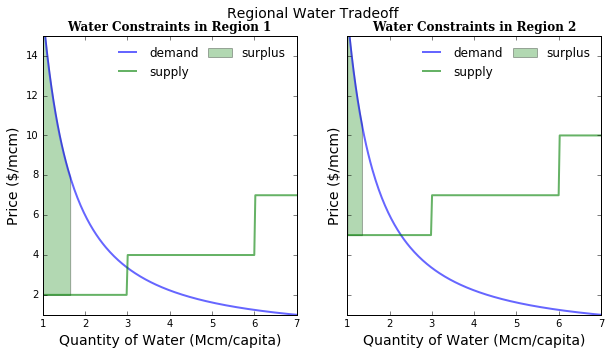

In [8]:
from EconGraphs import highAltMarket
graphMaker.annotate()
interact(graphMaker.drawTradeoff, totalSupply = fixed(3), firstMarketFrac = (.1,1,.05),otherMarket=fixed(highAltMarket),annotate=False)

In the above scenario the best way to allocate water is not as clear.  Water is more expensive in the Market 2, and thus it may be wasteful to pump water to Market 2 when it could be used in Market 1 at a lower price.

The optimal allocation in this region will be when _the net social benefit of another unit of water_, or _**marginal surplus**_, is the same in both markets.  To understand why, consider a scenario where the marginal surplus in Market 1 is greater than the marginal surplus in Market 2.  Moving a unit of water from Market 1 to Market 2 would increase the social welfare from the water, increasing the social welfare in the region.  So, if water is not allocated so that the two markets have the same _**marginal surplus**_,  social welfare may be increased by changing the allocation.  

Thus under the optimal allocation an additional unit of water increases social welfare equally, no matter what region is goes to, because each region has the same _**marginal surplus**_ for water.

#### Was calculates optimal allocation outside of equilibrium

WAS calculates the optimal levels of supply to determine the optimal allocation, in which the _**marginal surplus**_ is the same in every market.  Use the slider below to see optimal allocation within a region as water availability changes.

<function ipywidgets.widgets.interaction.<lambda>>

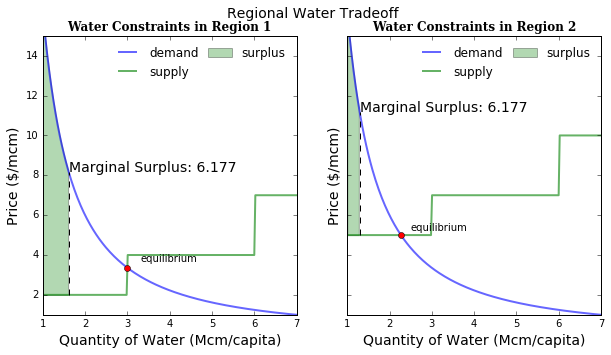

In [9]:
graphMaker.annotate()
interact(graphMaker.drawOptimalTradeoff,totalSupply = (2,5,.1), otherMarket = fixed(highAltMarket),annotate=fixed(True), continuous_update=False)

### Shadow Values

In the real world, water resources are constrained by: 
* the amount of water available at the source
* the amount of water _sustainabily_ available at the source
* the capacity of pumps
* the capacity of water connections
* the absence of connections between markets

It is possible to put a "value" on each of these constraints: using economic theory we can determine how beneficial it would be to ease each restriction.

##### Shadow values for constraints

The **shadow value** of a constraint is the increase in social welfare resulting from relaxing the constaint by a single unit.  For example:

* A shadow value of .10 for a water pumping station means that social welfare would increase by \$.10 if the pump capacity was increased by 1 cm _at no cost_
* A shadow value of .05 for a pipeline means that social welfare would increase by \$.10 if the pipeline capacity was increased by 1 cm _at no cost_

The shadow value does **not** include the cost of providing additional water.

##### Shadow values for individual water sources

Each water source also has a **shadow value**, since the limited supply of water at each source can be considered a constraint.  The shadow value of water at the source is the social welfare from providing an additional unit of water _at no cost_.  The shadow value for a water source is also the price the market would be willing to pay for the next unit of water.  This is illustrated below.

<function ipywidgets.widgets.interaction.<lambda>>

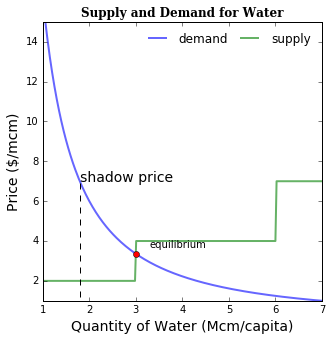

In [10]:
interact(graphMaker.drawShadowValue,quantity=(1,3,.2),drawSurplus=fixed(False),scarcityRent=False, annotate=fixed(True))

_**Scarcity rent**_ is a synonym for marginal surplus.  Notice that the scarcity rent drawn above is the same as the margnial surplus described earlier.  

When there is no marginal cost to producing an additional unit of water, the scarcity rent for a market is the same as the shaddow value, as illustrated below.

<function ipywidgets.widgets.interaction.<lambda>>

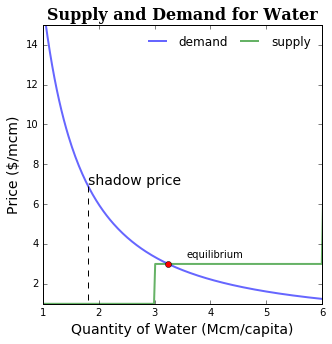

In [11]:
lowMrktGraphMaker = scenarioSimulator(springMarket)
interact(lowMrktGraphMaker.drawShadowValue,quantity=(1,3,.2),drawSurplus=fixed(False),scarcityRent=False, annotate=fixed(True))

Shadow prices are useful because they allow comparison of demand for water in different markets.  To make useful comparisons, it is **very important** to subtract expected costs from shaddow values when calculating the social value added from more water or new infrastrucure.  This is necessary because the shaddow value represents the increase in social welfare from an additional _cost free_ unit of water.


## Economic Concepts in WAS

The basic uses of WAS are [desribed above](##Applications of WAS).  They are desribed here in greater detail using the previosly defined concepts.

WAS can be used to discover:
 * Optimal water allocation among regions or countries using existing linkages
 * If international linkages would produce increase social welfare (and in whiche countries)
 * Which linkages or new infrastructure would be most socially valuable
 * The increase in social welfare that would result from international collboration
 * The optimal allocation of water under sustainability constraints
 * The costs and benefits of using water sustainabily
 
and within each country:
 * Comparing social welfare gain from proposed infrastructure
 * The specific value of (or cost target of) proposed water infrastrucutre
 * How to optimally (re-)allocate water using only the current infrastrucure
 * The effects of different social policies on all of the questions above
 * The effects of several environmental policies on all of the questions above




The






Why use WAS? What is the purpose?

How does WAS work?
    -what do we mean by social benefits
    -how does was know how to maximize social benefits
    -what else does WAS tell us

How does WAS allow us to answer other questions?
    -scarcity 

